<a href="https://colab.research.google.com/github/ArthAgrawal/DigiSwasth/blob/main/Kidney_Stone_Training_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Oct  1 20:34:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")


GPU is available


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**This is the dataset with augmentations(using albumentation library) already applied**


In [ ]:
import os
folder_path = '/content/drive/My Drive/KidneyStones_Augmented'
for filename in os.listdir(folder_path):
    print(filename)

Normal_augmented
Kidney_stone_augmented


**Now we make a directory in the current colab notebook**

In [ ]:
import shutil
destination_path = '/content/KidneyStones'
shutil.copytree(folder_path, destination_path)

'/content/KidneyStones'

In [ ]:
import os

folder_path = '/content/KidneyStones'

for subdir, dirs, files in os.walk(folder_path):
    if subdir != folder_path:
        print(f"Directory: {subdir}")
        print(f"Number of files: {len(files)}")
        print()


Directory: /content/KidneyStones/Normal_augmented
Number of files: 2001

Directory: /content/KidneyStones/Kidney_stone_augmented
Number of files: 2001



**There are 2001 files as 2000 images + 1 csv file which has all the augmentations logged**

In [ ]:
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


**Creating a OOD class using Cifar10 dataset**

In [ ]:
import numpy as np
import os
import tensorflow as tf

# Loading the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

save_path = '/content/cifar10'

if not os.path.exists(save_path):
    os.makedirs(save_path)

np.save(os.path.join(save_path, 'train_images.npy'), train_images)
np.save(os.path.join(save_path, 'train_labels.npy'), train_labels)
np.save(os.path.join(save_path, 'test_images.npy'), test_images)
np.save(os.path.join(save_path, 'test_labels.npy'), test_labels)

print("CIFAR-10 dataset saved successfully.")


CIFAR-10 dataset saved successfully.


**Now, we will save 1400 random images from the Cifar10 dataset**

In [ ]:
import numpy as np
import tensorflow as tf
import os
from PIL import Image

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Combining train and test images and labels as we dont need labels of the OOD set, we just need all these images together classified as OOD
all_images = np.concatenate([train_images, test_images])
all_labels = np.concatenate([train_labels, test_labels])

num_classes = 10
images_per_class = 140

save_dir = '/content/cifar10_subset_balanced'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

def save_images(images, directory):
    for i, img_array in enumerate(images):
        img = Image.fromarray(img_array)
        img.save(os.path.join(directory, f'image_{i}.png'))
        if i % 100 == 0:
            print(f"Saved {i} images.")

# Selecting 140 images per class
subset_images = []
for class_id in range(num_classes):
    class_indices = np.where(all_labels == class_id)[0]
    selected_indices = np.random.choice(class_indices, images_per_class, replace=False)
    subset_images.extend(all_images[selected_indices])

# This converts the list to a numpy array
subset_images = np.array(subset_images)

save_images(subset_images, save_dir)

print(f"Balanced subset of 1400 CIFAR-10 images (140 per class) have been saved to {save_dir}.")


Saved 0 images.
Saved 100 images.
Saved 200 images.
Saved 300 images.
Saved 400 images.
Saved 500 images.
Saved 600 images.
Saved 700 images.
Saved 800 images.
Saved 900 images.
Saved 1000 images.
Saved 1100 images.
Saved 1200 images.
Saved 1300 images.
Balanced subset of 1400 CIFAR-10 images (140 per class) have been saved to /content/cifar10_subset_balanced.


**The images saved are balanced from all 10 classes in Cifar10**

In [ ]:
import shutil
import os

src_path = '/content/cifar10_subset_balanced'
dest_path = '/content/KidneyStones/ODD(Cifar10_Subset)'


if not os.path.exists(dest_path):
    shutil.move(src_path, dest_path)
    print(f"Moved and renamed {src_path} to {dest_path}.")
else:
    print(f"Destination directory {dest_path} already exists.")


Moved and renamed /content/cifar10_subset_balanced to /content/KidneyStones/ODD(Cifar10_Subset).


In [ ]:
import os

folder_path = '/content/KidneyStones'

for subdir, dirs, files in os.walk(folder_path):
    if subdir != folder_path:
        print(f"Directory: {subdir}")
        print(f"Number of files: {len(files)}")
        print()


Directory: /content/KidneyStones/Normal_augmented
Number of files: 2001

Directory: /content/KidneyStones/Kidney_stone_augmented
Number of files: 2001

Directory: /content/KidneyStones/ODD(Cifar10_Subset)
Number of files: 1400



**Now, I have taken 150 images of other MRI scans(not kidney stone) to make sure our model can distinguish other MRI scans and can make sure to classify them as "NOT Kidney Stone Scans"**

In [ ]:
import os
import shutil
import random

drive_folder = '/content/drive/MyDrive/BrainCancer/pituitary'  # Taking 150 MRI scans from the brain tumor dataset
colab_folder = '/content/KidneyStones/ODD(Cifar10_Subset)' # Adding them to the OOD class


image_extensions = ('.jpg', '.jpeg', '.png')
all_images = [f for f in os.listdir(drive_folder) if f.lower().endswith(image_extensions)]

if len(all_images) < 150:
    raise ValueError(f"Not enough images in the source folder. Found {len(all_images)} images.")

# Randomly selecting 150 images
selected_images = random.sample(all_images, 150)

for image in selected_images:
    src_path = os.path.join(drive_folder, image)
    dst_path = os.path.join(colab_folder, image)
    shutil.copy(src_path, dst_path)

print(f"Copied 150 random images from {drive_folder} to {colab_folder}.")


Copied 150 random images from /content/drive/MyDrive/BrainCancer/pituitary to /content/KidneyStones/ODD(Cifar10_Subset).


In [ ]:
import os
import shutil
import random

drive_folder = '/content/drive/MyDrive/LungCancer/Normal cases'  # Taking 150 MRI scans from the lung cancer dataset
colab_folder = '/content/KidneyStones/ODD(Cifar10_Subset)' # Adding them to the OOD class


image_extensions = ('.jpg', '.jpeg', '.png')
all_images = [f for f in os.listdir(drive_folder) if f.lower().endswith(image_extensions)]

if len(all_images) < 150:
    raise ValueError(f"Not enough images in the source folder. Found {len(all_images)} images.")

# Randomly selecting 150 images
selected_images = random.sample(all_images, 150)

for image in selected_images:
    src_path = os.path.join(drive_folder, image)
    dst_path = os.path.join(colab_folder, image)
    shutil.copy(src_path, dst_path)

print(f"Copied 150 random images from {drive_folder} to {colab_folder}.")


Copied 150 random images from /content/drive/MyDrive/LungCancer/Normal cases to /content/KidneyStones/ODD(Cifar10_Subset).


In [ ]:
import os
import shutil
import random

drive_folder = '/content/drive/MyDrive/Breast_Cancer_Patients_MRI/Healthy'  # Taking 150 MRI scans from the breast cancer dataset
colab_folder = '/content/KidneyStones/ODD(Cifar10_Subset)' # Adding them to the OOD class


image_extensions = ('.jpg', '.jpeg', '.png')
all_images = [f for f in os.listdir(drive_folder) if f.lower().endswith(image_extensions)]

if len(all_images) < 150:
    raise ValueError(f"Not enough images in the source folder. Found {len(all_images)} images.")

# Randomly selecting 150 images
selected_images = random.sample(all_images, 150)

for image in selected_images:
    src_path = os.path.join(drive_folder, image)
    dst_path = os.path.join(colab_folder, image)
    shutil.copy(src_path, dst_path)

print(f"Copied 150 random images from {drive_folder} to {colab_folder}.")


Copied 150 random images from /content/drive/MyDrive/Breast_Cancer_Patients_MRI/Healthy to /content/KidneyStones/ODD(Cifar10_Subset).


In [ ]:
from PIL import Image
import os

def resize_images(directory, target_size):
    for filename in os.listdir(directory):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            filepath = os.path.join(directory, filename)
            with Image.open(filepath) as img:
                resized_img = img.resize(target_size)
                resized_img.save(filepath)  # Overwrite the existing image or save as a new file

odds_directory = '/content/KidneyStones/ODD(Cifar10_Subset)'
target_size = (256, 256)

resize_images(odds_directory, target_size)


**The above code normalises all images to a standard size (256x256)**

In [ ]:
import shutil
import os

def delete_folder(folder_path):
    if os.path.exists(folder_path):
        try:
            shutil.rmtree(folder_path)
            print(f"Deleted folder: {folder_path}")
        except Exception as e:
            print(f"Could not delete folder {folder_path}: {e}")
    else:
        print(f"Folder does not exist: {folder_path}")

folder_path = '/content/cifar10'
delete_folder(folder_path)


Deleted folder: /content/cifar10


**We have already shifted OOD to the required directory, so we delete the original**

In [ ]:
import os

file_path = '/content/KidneyStones/Kidney_stone_augmented/augmentation_log.csv'

if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been removed.")
else:
    print(f"{file_path} does not exist.")


/content/KidneyStones/Kidney_stone_augmented/augmentation_log.csv has been removed.


**The above and below code delete the csv file (augmentation_log.csv) as we dont need that during training**

In [ ]:
import os

file_path = '/content/KidneyStones/Normal_augmented/augmentation_log.csv'

if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been removed.")
else:
    print(f"{file_path} does not exist.")


/content/KidneyStones/Normal_augmented/augmentation_log.csv has been removed.


In [ ]:
import os

folder_path = '/content/KidneyStones'

for subdir, dirs, files in os.walk(folder_path):
    if subdir != folder_path:
        print(f"Directory: {subdir}")
        print(f"Number of files: {len(files)}")
        print()


Directory: /content/KidneyStones/Normal_augmented
Number of files: 2000

Directory: /content/KidneyStones/Kidney_stone_augmented
Number of files: 2000

Directory: /content/KidneyStones/ODD(Cifar10_Subset)
Number of files: 1850



**This is the final count of all 3 classes in the dataset made**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 40


In [ ]:
import tensorflow as tf
path = '/content/KidneyStones'

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names = dataset.class_names
print(f"Class names: {class_names}")
print(f"Number of batches: {len(dataset)}")


Found 5850 files belonging to 3 classes.
Class names: ['Kidney_stone_augmented', 'Normal_augmented', 'ODD(Cifar10_Subset)']
Number of batches: 183


**shuffle=True: Randomly shuffles the data to ensure variety in batches during training**

In [ ]:
len(dataset)

183

**This is the number of batches(total batches = training batches + validation batches + test batches)**

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 1 0 2 0 1 2 0 2 1 1 0 0 0 1 2 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0]


**This code retrieves one batch of images and their labels from the dataset, prints the dimensions of the image batch (indicating the number of images, their size, and color channels), and prints the actual labels (class indices) for the images in the batch**

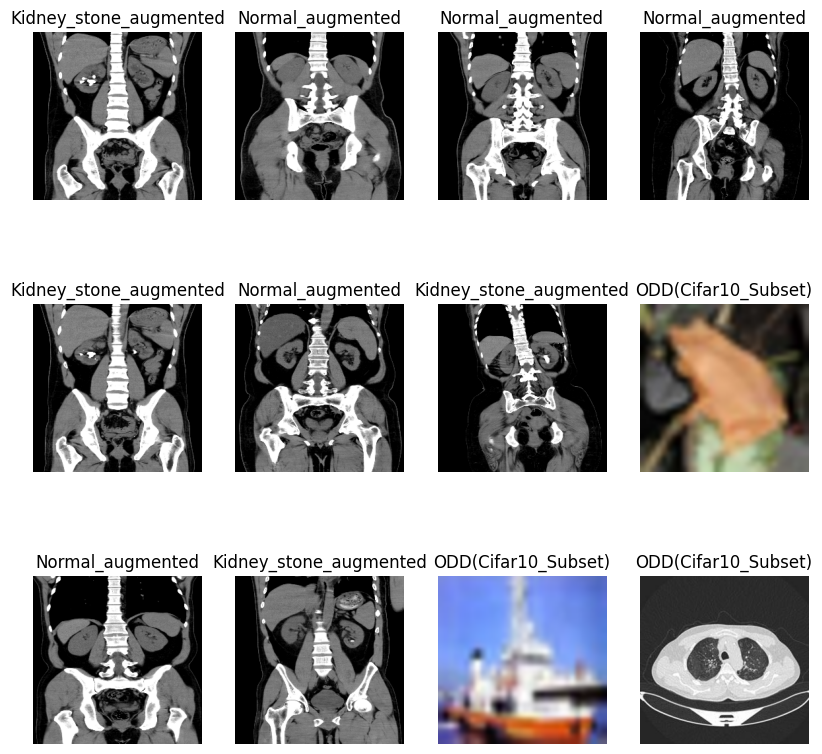

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
  for i in range (12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
import tensorflow as tf

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

dataset_size = len(dataset)

# Defining split ratios
train_size = int(dataset_size * 0.8)
val_size = int(dataset_size * 0.1)
test_size = dataset_size - train_size - val_size

# Creating train, validation, and test datasets
train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size + val_size)


Found 5850 files belonging to 3 classes.


**train_ds: 80% of the data used for training val_ds: 10% for validation test_ds: 10% for final testing. **

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


 These methods help the data pipeline (the process of loading your images) run faster and smoother by:

Cache: Storing the data in memory after the first use so it doesn't need to be loaded from the disk every time.

Shuffle: Mixing the data randomly, which helps the model learn better by preventing it from memorizing the order of the data.

Prefetch: Preparing the next batch of data while the model is still working on the current batch, so there's no waiting time between batches.
This makes the entire training and evaluation process quicker and more efficient.

In [ ]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

146
18
19


**This is again, numer of batches in each set**

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

**This just re-ensures all images are of the required size 256x256 and then downscales them**

In [ ]:
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

n_classes = 3  # There are 3 classes (Normal, Kidney Stone, OOD)
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Load ResNet50 model with pre-trained weights, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers so that they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Adding custom layers on top of ResNet50
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Use GlobalAveragePooling instead of Flatten
    layers.Dense(128, activation='relu'),  # Custom dense layer 1
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),   # Custom dense layer 2
    layers.Dense(32, activation='relu'),   # Custom dense layer 3
    layers.Dense(n_classes, activation='softmax'),  # Output layer
])

model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.summary()

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tqdm.keras import TqdmCallback

tqdm_callback = TqdmCallback()

reduce_lr = ReduceLROnPlateau( # ReduceLROnPlateau is a learning rate scheduler that reduces the learning rate when the model's performance stops improving
    monitor='val_loss',  # The metric used for monitoring is validation loss
    factor=0.5,          # Factor by which the learning rate will be reduced
    patience=3,          # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6,         # Minimum learning rate
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=9,                   # If validation loss doesn't decrease after 9 consecutive epochs, training is stopped and best weights are restored
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[tqdm_callback, early_stopping, reduce_lr],
    verbose=1
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 8, 8, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,860,419 (91.02 MB)

 Trainable params: 272,707 (1.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 47s 175ms/step - accuracy: 0.6320 - loss: 0.7127 - val_accuracy: 0.6840 - val_loss: 0.4659 - learning_rate: 0.0010
Epoch 2/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.6864 - loss: 0.4895 - val_accuracy: 0.7344 - val_loss: 0.4411 - learning_rate: 0.0010
Epoch 3/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - accuracy: 0.7326 - loss: 0.4519 - val_accuracy: 0.7743 - val_loss: 0.4312 - learning_rate: 0.0010
Epoch 4/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 0.7443 - loss: 0.4414 - val_accuracy: 0.7517 - val_loss: 0.4218 - learning_rate: 0.0010
Epoch 5/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - accuracy: 0.7458 - loss: 0.4342 - val_accuracy: 0.7951 - val_loss: 0.3918 - learning_rate: 0.0010
Epoch 6/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.7693 - loss: 0.4190 - val_accuracy: 0.7865 - val_loss: 0.3938 - learning_rate: 0.0010
Epoch 7/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 0.7

In [ ]:
scores = model.evaluate(test_ds)

19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 309ms/step - accuracy: 0.8360 - loss: 0.3181


In [ ]:
scores

[0.31370416283607483, 0.840531587600708]

In [ ]:
history

In [ ]:
loss, accuracy = scores

accuracy_percentage = round(accuracy * 100, 2)

print(f"Final accuracy of the model is: {accuracy_percentage}%")


Final accuracy of the model is: 84.05%


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

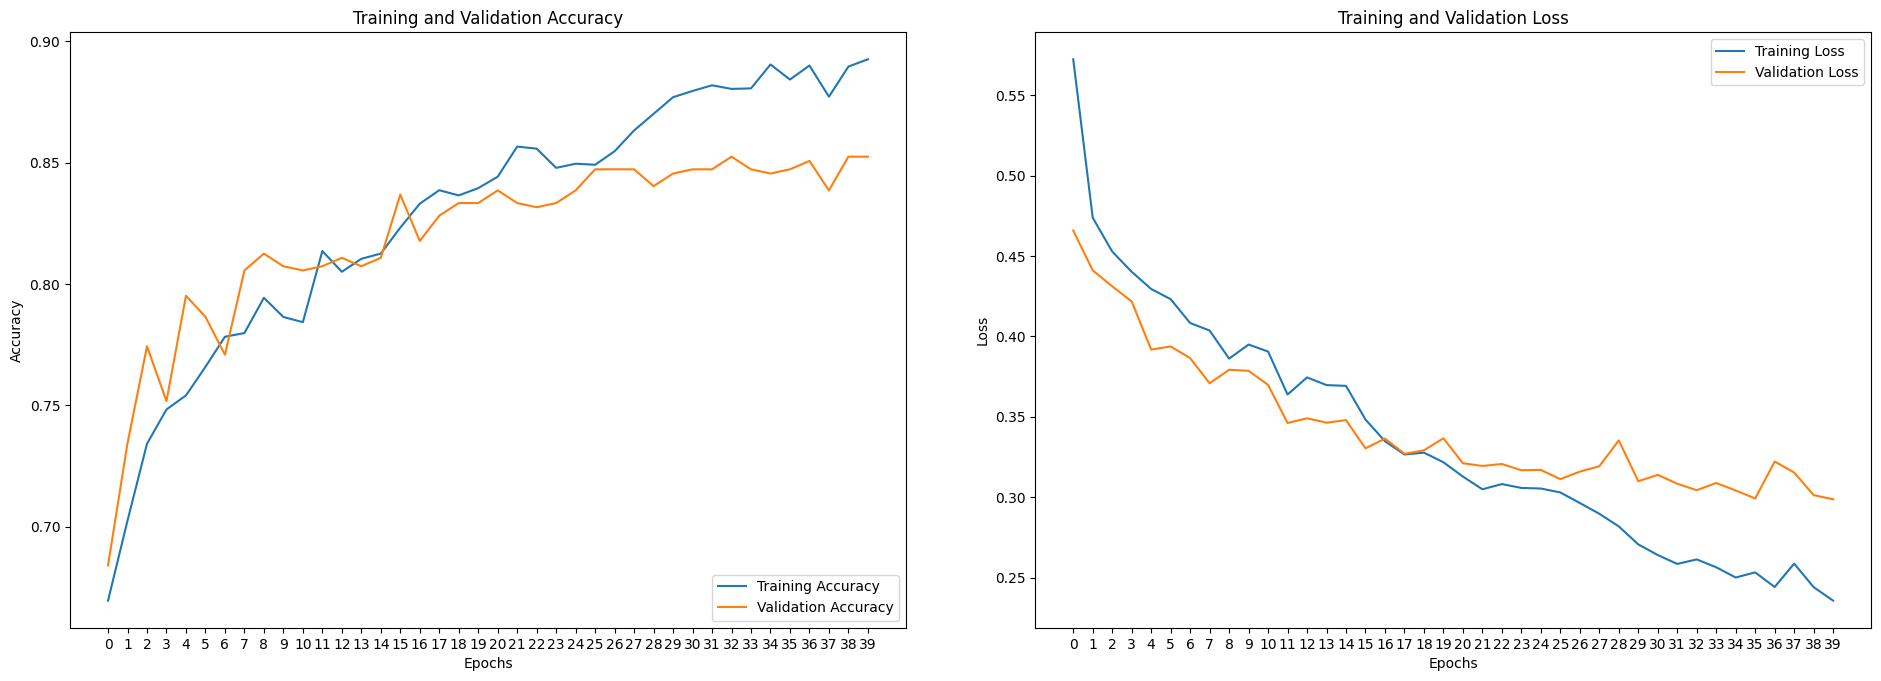

In [ ]:
import matplotlib.pyplot as plt

epochs_run = len(history.history['accuracy'])

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.plot(range(epochs_run), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs_run), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(epochs_run))

plt.subplot(1, 2, 2)
plt.plot(range(epochs_run), history.history['loss'], label='Training Loss')
plt.plot(range(epochs_run), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(epochs_run))

plt.tight_layout(pad=5.0)
plt.show()


first image to predict
actual label: ODD(Cifar10_Subset)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predicted label: ODD(Cifar10_Subset)


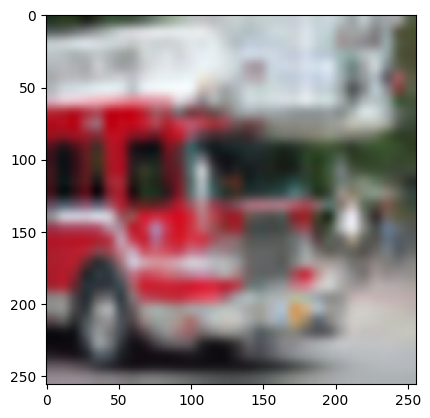

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[1].numpy().astype('uint8')
    first_label = labels_batch[1].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[1])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


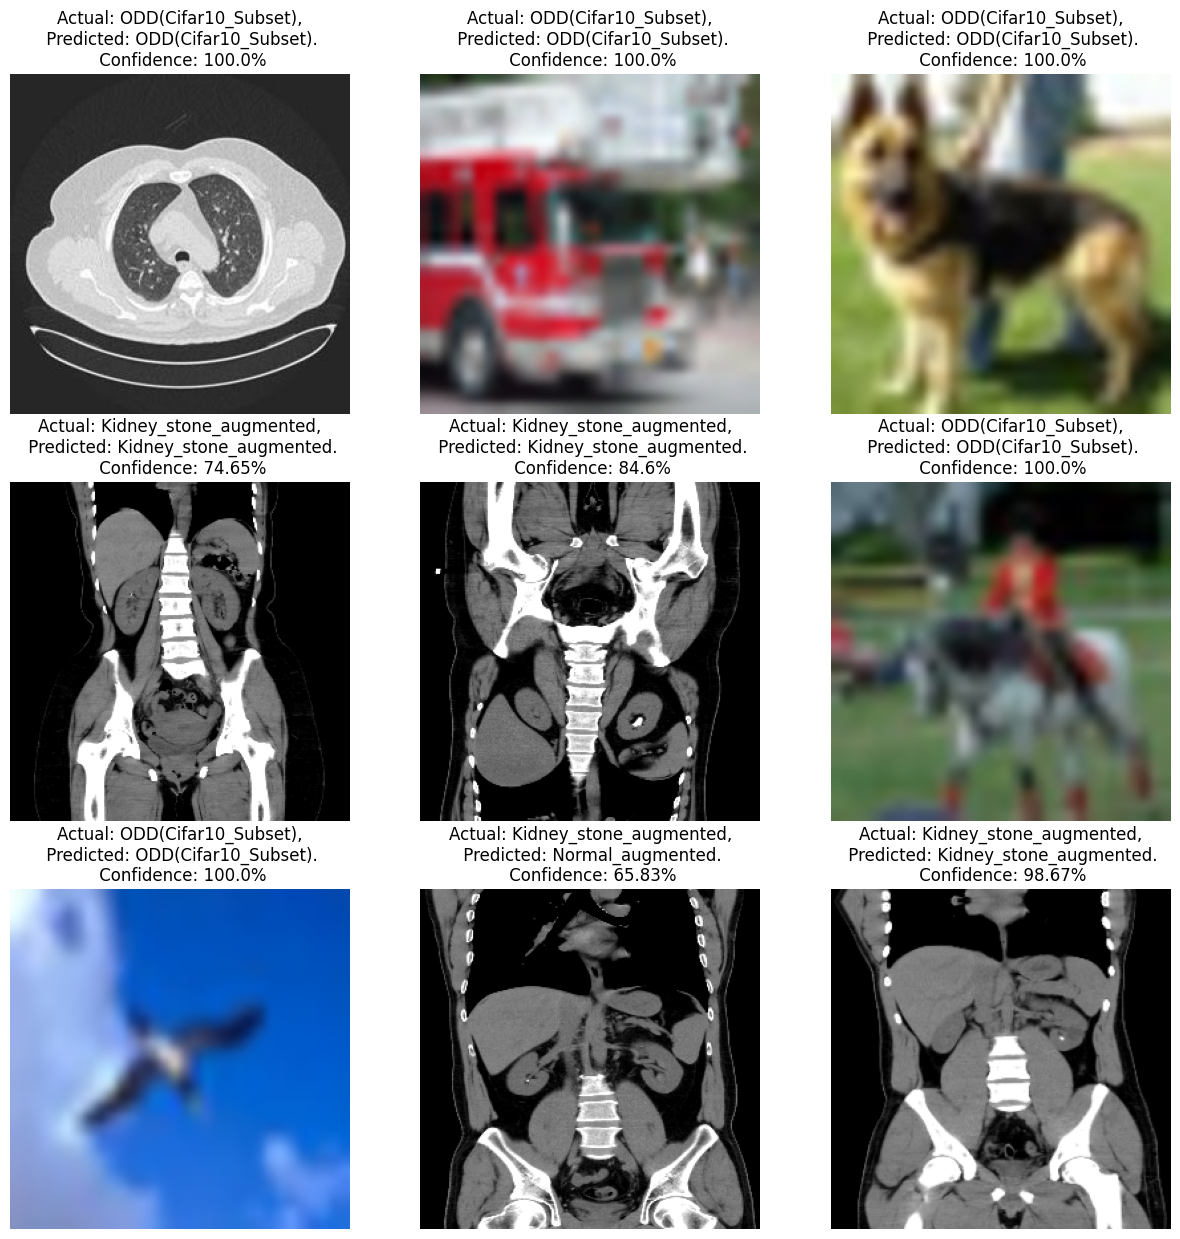

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

model_dir = '/content/drive/MyDrive/models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_name = 'KidneyStones_v4.h5'

model.save(os.path.join(model_dir, model_name))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Saving the model as an h5 file in Google Drive**